<a href="https://colab.research.google.com/github/aliu-7/Molecular-Property-Prediction-and-Optimization/blob/main/4_3_4_Interpreting_Random_Forest_Outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rerun previous code to setup df_desc

In [ ]:
!pip install -q rdkit pandas scikit-learn
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load BBBP dataset from GitHub
url = "https://raw.githubusercontent.com/Data-Chemist-Handbook/Data-Chemist-Handbook.github.io/refs/heads/master/_pages/BBBP.csv"
data = pd.read_csv(url)
data.head()

# Step 4: Feature Extraction with RDKit (safe handling)
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {
            'MolWt': Descriptors.MolWt(mol),
            'LogP': Descriptors.MolLogP(mol),
            'NumHDonors': Descriptors.NumHDonors(mol),
            'NumHAcceptors': Descriptors.NumHAcceptors(mol),
            'TPSA': Descriptors.TPSA(mol),
            'NumRotatableBonds': Descriptors.NumRotatableBonds(mol)
        }
    else:
        return None

# Apply descriptor function
descriptor_data = data['smiles'].apply(compute_descriptors)

# Filter out failed SMILES rows
valid_mask = descriptor_data.notnull()
df_desc = pd.DataFrame(descriptor_data[valid_mask].tolist())
df_desc['Label'] = data['p_np'][valid_mask].values

# Split into input features and labels
X = df_desc.drop('Label', axis=1)
y = df_desc['Label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 65.2 MB/s eta 0:00:00


[23:11:59] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:11:59] WARNING: not removing hydrogen atom without neighbors
[23:11:59] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:11:59] WARNING: not removing hydrogen atom without neighbors
[23:11:59] WARNING: not removing hydrogen atom without neighbors
[23:11:59] WARNING: not removing hydrogen atom without neighbors
[23:11:59] WARNING: not removing hydrogen atom without neighbors
[23:11:59] WARNING: not removing hydrogen atom without neighbors
[23:11:59] WARNING: not removing hydrogen atom without neighbors
[23:11:59] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:11:59] WARNING: not removing hydrogen atom without neighbors
[23:11:59] WARNING: not removing hydrogen atom without neighbors
[23:11:59] WARNING: not removing hydrogen atom without neighbors
[23:11:59] WARNING: not removing hydrogen atom without neighbors
[23:11:59] Explicit valence for atom # 11 N, 4, is greater than pe

RandomForestClassifier(random_state=42)

# Example: Visualizing Descriptor Importance

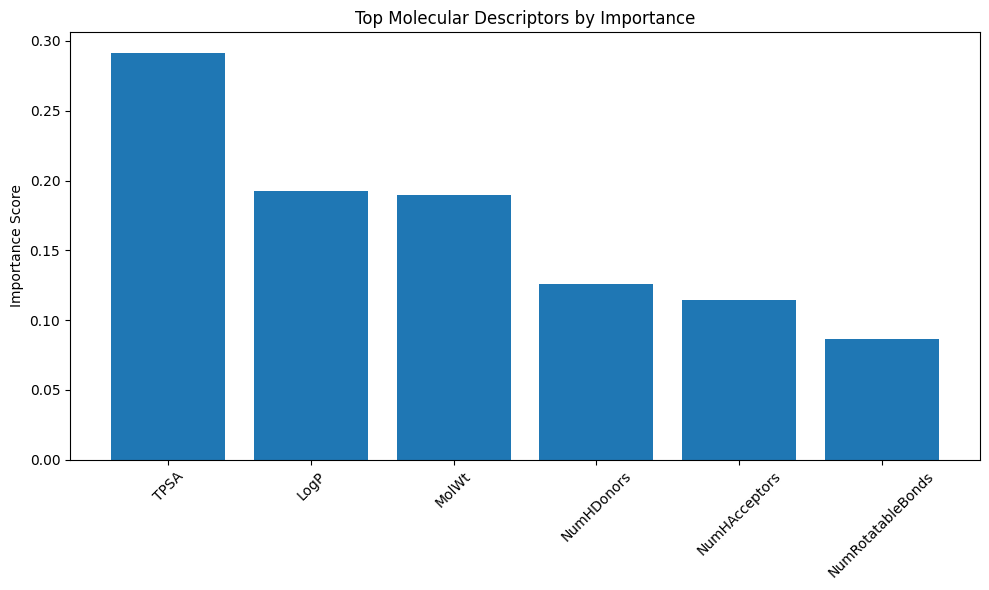

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example setup
X = df_desc.drop("Label", axis=1).values
y = df_desc["Label"].values
feature_names = df_desc.drop("Label", axis=1).columns

# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Compute feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # sort descending

# Visualize top 10 features
top_k = min(10, len(feature_names))
plt.figure(figsize=(10, 6))
plt.title("Top Molecular Descriptors by Importance")
plt.bar(range(top_k), importances[indices[:top_k]])
plt.xticks(range(top_k), feature_names[indices[:top_k]], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# Practice Problem: Investigating Descriptor Roles

**Practice Problem:**

1. Use the Random Forest trained above.
2. Identify the three most important descriptors.
3. Write a short explanation of why each might influence BBB permeability from a chemical perspective.

In [ ]:
top3_indices = indices[:3]
for i in top3_indices:
    print(f"{feature_names[i]} - Importance: {importances[i]:.3f}")

TPSA - Importance: 0.292
LogP - Importance: 0.192
MolWt - Importance: 0.190
